In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
 # reading the txt file into pandas
data = pd.read_csv("A1-synthetic.txt", delimiter="\t")

In [3]:
data[:3]

,v1,v2,v3,v4,v5,v6,v7,v8,v9,z
0,37.344110,10.542156,0.969185,3.568534,96.798733,3.429026,75.810196,0,20.002459,11.805369
1,4.089849,11.894301,0.467775,1.279044,100.149383,3.190073,76.423095,0,12.702628,5.125025
2,-32.333439,10.968631,0.238486,1.410745,100.642075,3.093934,78.758727,1,10.723848,3.218553


In [4]:
v1 = data["v1"]
v2 = data["v2"]
v3 = data["v3"]
v4 = data["v4"]
v5 = data["v5"]
v6 = data["v6"]
v7 = data["v7"]
v8 = data["v8"]
v9 = data["v9"]

y = data["z"]


In [5]:
X = np.array([
    v1, v2, v3, v4, v5, v6, v7, v8, v9
]).T

y = np.array([y]).T

In [6]:
X.shape

(1000, 9)

In [7]:
y.shape

(1000, 1)

In [8]:
# Normalizing the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / std

mean = np.mean(y, axis=0)
std = np.std(y, axis=0)
y = (y - mean) / std

In [9]:
X[:3]

array([[ 1.28066308, -0.79345051,  1.61652059,  1.00403924, -0.67674149,
         2.55338497, -0.46635316, -0.6749845 ,  1.8864787 ],
       [ 0.10989567,  1.52266861, -0.15431043, -0.9925339 ,  0.0082982 ,
         1.68463696, -0.34411627, -0.6749845 , -0.35848683],
       [-1.17244218, -0.06293159, -0.96408809, -0.87768258,  0.10902895,
         1.33511181,  0.12170321,  1.4815155 , -0.96703443]])

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [11]:
def sigmoid(x):
  # Activation function
    return 1/(1 + np.exp(-x))

In [12]:
def sigmoid_derivative(x):
  # Derivative of the activation function
    return x * (1 - x)

In [13]:
# Initialize the network parameters
# number of units in each layer
n = [9, 15, 10, 1]
# number of layers
L = len(n)
# fields
h = [np.zeros(n[i]) for i in range(L)]
# activations
xi = [np.zeros(n[i]) for i in range(L)]
# weights
w = [np.random.rand(n[i], n[i+1]) for i in range(L-1)]
# thresholds
theta = [np.zeros(n[i]) for i in range(L)]
# error propagation
delta = [np.zeros(n[i]) for i in range(L)]
# weight changes
d_w = [np.zeros(w[i].shape) for i in range(L-1)]
# threshold changes
d_theta = [np.zeros(theta[i].shape) for i in range(L)]
# previous weight changes
d_w_prev = [np.zeros(w[i].shape) for i in range(L-1)]
# previous threshold changes
d_theta_prev = [np.zeros(theta[i].shape) for i in range(L)]
# learning rate
learning_rate = 0.01
# number of epochs
epochs = 600


In [14]:
# Train the network
for epoch in range(epochs):
    # Forward propagation
    h[0] = X_train # input layer
    for i in range(1, L):
    # field before activation
        xi[i] = np.dot(h[i-1], w[i-1]) + theta[i]
        # activation
        h[i] = sigmoid(xi[i])
    # output prediction
    y_pred = h[L-1]
  
  # Compute the loss
    loss = np.mean((y_train - y_pred)**2)
  
  # Backward propagation
  # error at output layer
    delta[L-1] = 2*(y_train - y_pred) * sigmoid_derivative(xi[L-1])
    for i in range(L-2, -1, -1):
    # error at hidden layers
        delta[i] = np.dot(delta[i+1], w[i].T) * sigmoid_derivative(xi[i])
  
  # Update the weights and thresholds
    for i in range(L-1):
    # change in weights
        d_w[i] = learning_rate * np.dot(h[i].T, delta[i+1])
        # change in thresholds
        d_theta[i] = learning_rate * delta[i+1]
        # Use the momentum term to smooth out the weight and threshold updates
        d_w[i] = d_w[i] + 0
        

In [15]:
# Evaluate the network on the testing data
# input layer
h[0] = X_test 
for i in range(1, L):
  # field before activation
    xi[i] = np.dot(h[i-1], w[i-1]) + theta[i]
  # activation
    h[i] = sigmoid(xi[i])
# output prediction
y_pred = h[L-1]

# Compute the testing error
error = np.mean((y_test - y_pred)**2)
print('Testing error:', error)

Testing error: 1.8046252774480782


In [16]:
synthetic_res = pd.DataFrame(y_pred)

In [17]:
synthetic_res.rename(columns={0: "y_pred"}, inplace=True)
synthetic_res["real_value"] = y_test
synthetic_res.to_csv("synthetic_res.txt")

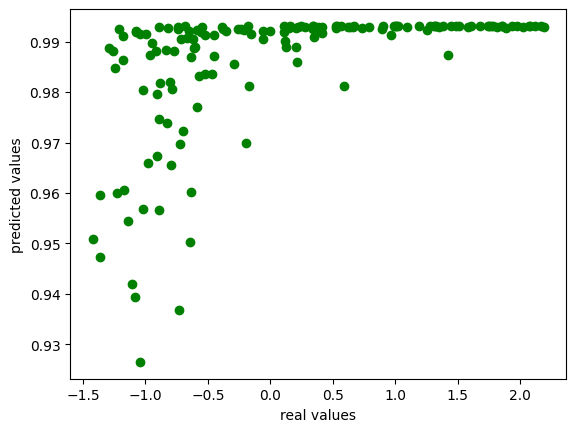

In [18]:
plt.scatter(synthetic_res.real_value, synthetic_res.y_pred, color="green")
plt.xlabel("real values")
plt.ylabel("predicted values")
plt.show()

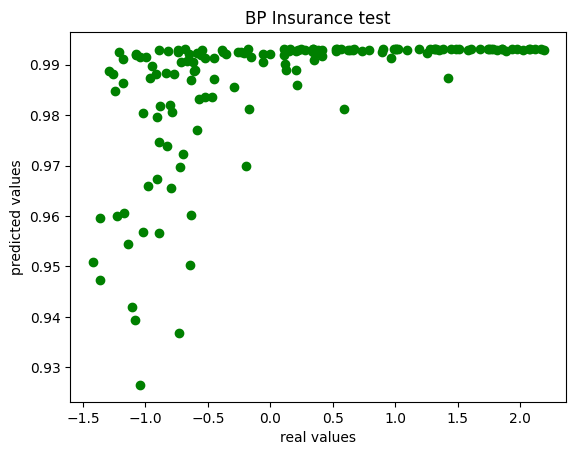

In [19]:
plt.scatter(y_test, h[i], color="green")
plt.xlabel("real values")
plt.ylabel("predicted values")
plt.title("BP Insurance test")
plt.show()